## Álvaro Sánchez de la Cruz, Marc Gil Arnau
# Tarea 1
# Ánalisis Exploratorio y Redes Neuronales Artificiales

Índice (pendiente por hacer, a medida que vayamos haciendo cosas las vamos metiendo)

## Sección I. Análisis descriptivo y exploratorio de la base de datos. Preprocesamiento

## 1.- Cargar y leer la base datos

In [81]:
# Bibliotecas utilizadas en esta primera sección
import pandas as pd
import numpy as np
import seaborn as sns 

import scipy
from scipy import stats as ss

import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [82]:
# Leermos y guardamos el fichero en un dataframe.
comercio_df = pd.read_csv("Dataset.csv")

comercio_df = comercio_df.drop("ID", axis='columns')

## 2.- Descripción del conjunto "E-Commerce Shipping"

Contexto: Una compañía internacional basada en vender productos electrónicos a través de internet quiere estudiar el comportamiento de sus clientes en base a ciertos datos de ventas. El objetivo es ver si el envío ha llegado a tiempo o no. Se trata de una tarea de clasificación.

Variables:

Warehouse Block: La compañía tiene 5 grandes almacenes (A, B, C, D, E). Categórica nominal.

Mode of shipment: La comapñía tiene 3 formas de entregar los productos (Ship, Flight, Road). Categórica nominal.

Customer care calls: Número de llamadas que hace el cliente a la compañía para preguntar sobre el estado del envío. Numérica discreta. Rango: [ 2 , 7 ].

Customer rating: Calificación del cliente sobre la compañía. 1 es lo peor, 5 es lo mejor. Numérica discreta ordinal.

Cost of the products: Precio del producto en dólares americanos. Numérica continua. Rango: [ 96 , 310 ].

Prior purchases: Número de compras realizadas por el cliente previamente. Numérica discreta. Rango: [ 2 , 10 ].

Product importance: La compañía ha caracterizado la importancia de cada producto (low, medium, high). Categórica ordinal.

Gender: Género del cliente (Male, Female). Categórica nominal.

Discount offered: Descuento ofrecido en el producto en porcentaje. Numérica continua. Rango: [ 1 , 65 ]

Weight in gms: Peso del producto en gramos. Numérica continua. Rango: [ 1001 , 7846 ].

Reached on time: Es la variable objetivo, 1 indica que el producto NO ha llegado a tiempo y 0 que sí lo ha hecho. Categórica nominal.


In [83]:
# Tipo de las variables (numérica, categórica, etc...)
comercio_df.dtypes

Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [84]:
# Nombres de las variables
comercio_df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

## 3.- Análisis descriptivo

In [85]:
# Vistazo rápido a los estadísticos de las variables
comercio_df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [86]:
# Tamaño de la base de datos (número de observaciones, número de muestras)
comercio_df.shape

(10999, 11)

In [87]:
# Número de valores únicos por variable
comercio_df.nunique()

Warehouse_block           5
Mode_of_Shipment          3
Customer_care_calls       6
Customer_rating           5
Cost_of_the_Product     215
Prior_purchases           8
Product_importance        3
Gender                    2
Discount_offered         65
Weight_in_gms          4034
Reached.on.Time_Y.N       2
dtype: int64

Viendo los resultados de .describe() y estos, podemos ver que no hay clientes que hayan llamado 0 ó 1 veces para informarse sobre su pedido así como también que los clientes estudiados tienen como mínimo 2 compras previas. Lo mismo a la compañía sólo le interesa el estudio de sus clientes "fieles".

In [88]:
# ¿Existen valores faltantes?
comercio_df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

A priori no hay valores faltantes aunque puede que estemos ante el caso de que los valores faltantes hayan sido sustituidos por 0.

In [89]:
# ¿Está balanceada la variable objetivo?
comercio_df["Reached.on.Time_Y.N"].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

La categorías no están perfectamente equilibradas pero tampoco podemos considerar un grave desbalanceo.

## 4.-Visualización

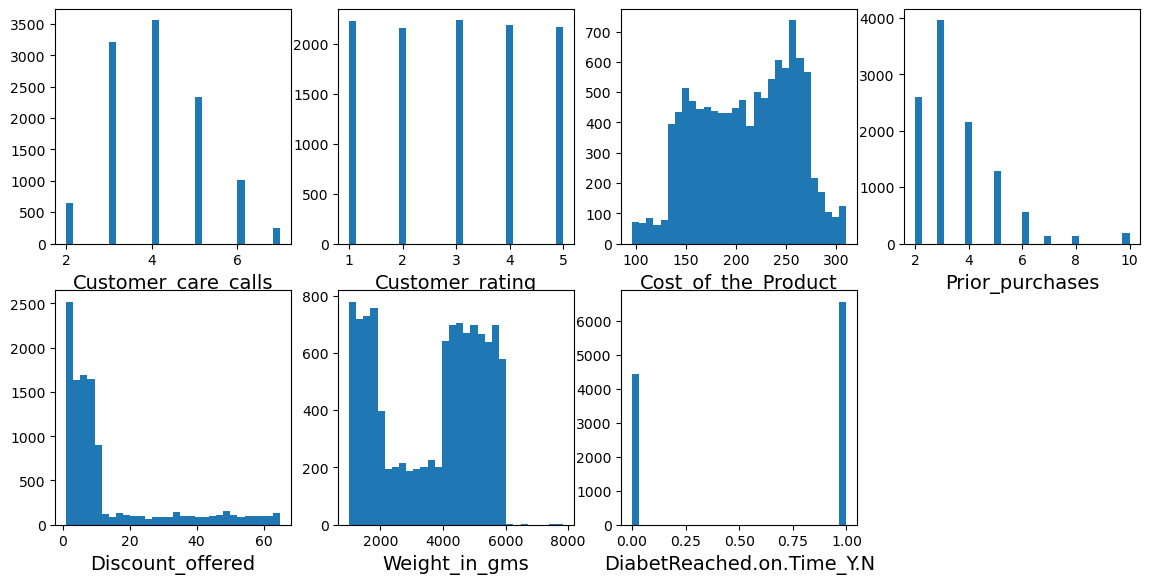

In [90]:
plt.figure(figsize=(14,14))

plt.subplot(4,4,1)
plt.hist(comercio_df["Customer_care_calls"],bins=30)
plt.xlabel('Customer_care_calls',fontsize=14)

plt.subplot(4,4,2)
plt.hist(comercio_df["Customer_rating"],bins=30)
plt.xlabel('Customer_rating',fontsize=14)

plt.subplot(4,4,3)
plt.hist(comercio_df["Cost_of_the_Product"],bins=30)
plt.xlabel('Cost_of_the_Product',fontsize=14)

plt.subplot(4,4,4)
plt.hist(comercio_df["Prior_purchases"],bins=30)
plt.xlabel('Prior_purchases',fontsize=14)

plt.subplot(4,4,5)
plt.hist(comercio_df["Discount_offered"],bins=30)
plt.xlabel('Discount_offered',fontsize=14)

plt.subplot(4,4,6)
plt.hist(comercio_df["Weight_in_gms"],bins=30)
plt.xlabel('Weight_in_gms',fontsize=14)

plt.subplot(4,4,7)
plt.hist(comercio_df["Reached.on.Time_Y.N"],bins=30)
plt.xlabel('DiabetReached.on.Time_Y.N',fontsize=14)



plt.show()

Destacamos el gráfico del peso, vamos a considerar que productos superiores a 6 Kg son productos atípicos.

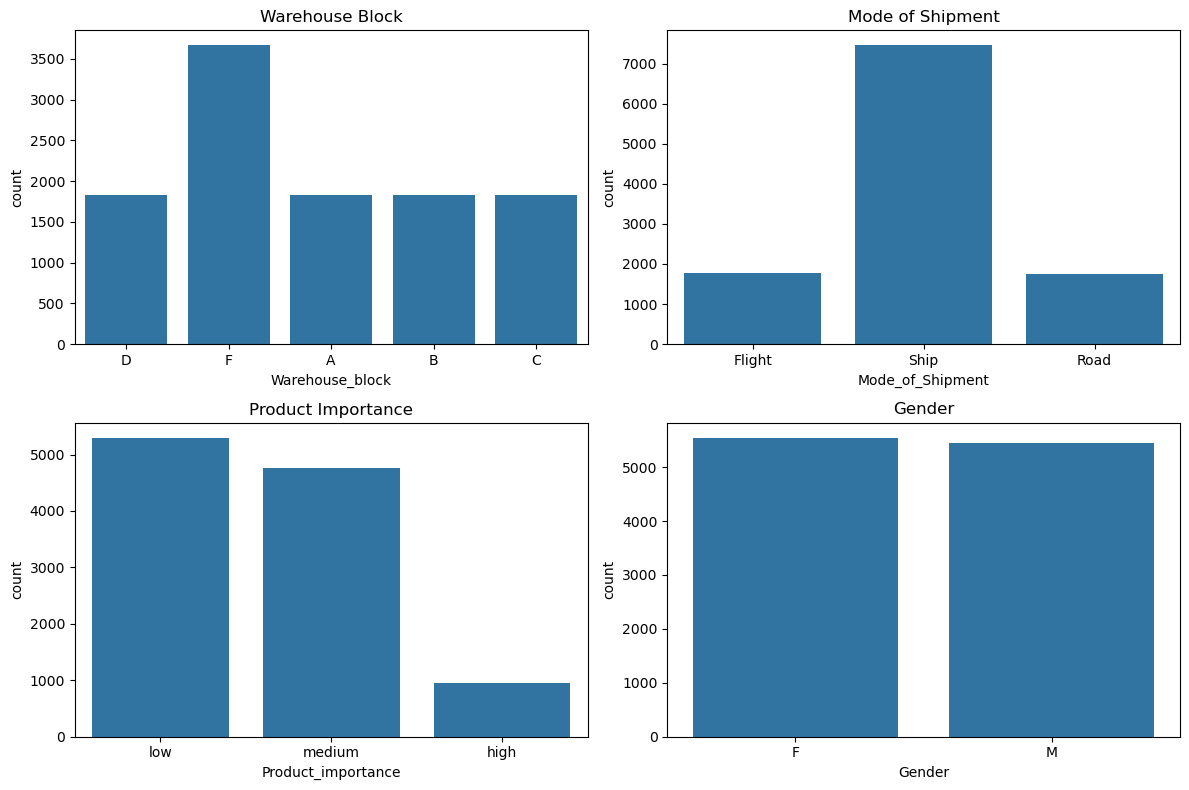

In [91]:

fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 filas x 2 columnas

sns.countplot(x="Warehouse_block", data=comercio_df, ax=axs[0, 0])
axs[0, 0].set_title("Warehouse Block")

sns.countplot(x="Mode_of_Shipment", data=comercio_df, ax=axs[0, 1])
axs[0, 1].set_title("Mode of Shipment")

sns.countplot(x="Product_importance", data=comercio_df, ax=axs[1, 0])
axs[1, 0].set_title("Product Importance")

sns.countplot(x="Gender", data=comercio_df, ax=axs[1, 1])
axs[1, 1].set_title("Gender")

plt.tight_layout()
plt.show()







Resalta el gráfico de los almacenes ya que todos aparentemente tienen la misma frecuencia excepto el almacén "F", que todos tengan la misma frecuencia podría deberse a que quien haya hecho la recogida de muestras ha querido coger el mismo número de clientes por almacén, es decir si cada almacén representase un continente, han escogido el mismo número de clientes por continente. Por otro lado, suponemos que "F" tiene el doble de clientes porque han juntado dos almacenes en uno.

A parte, nos resulta curioso estudiar qué pasa con la importancia del producto si separamos las muestras entre mujeres y hombres. Ya que si encontrasemos una gran diferencia estudiando las muestras dividas en comparación a juntándolas, crearíamos 2 modelos de clasificación diferenciados por género. 

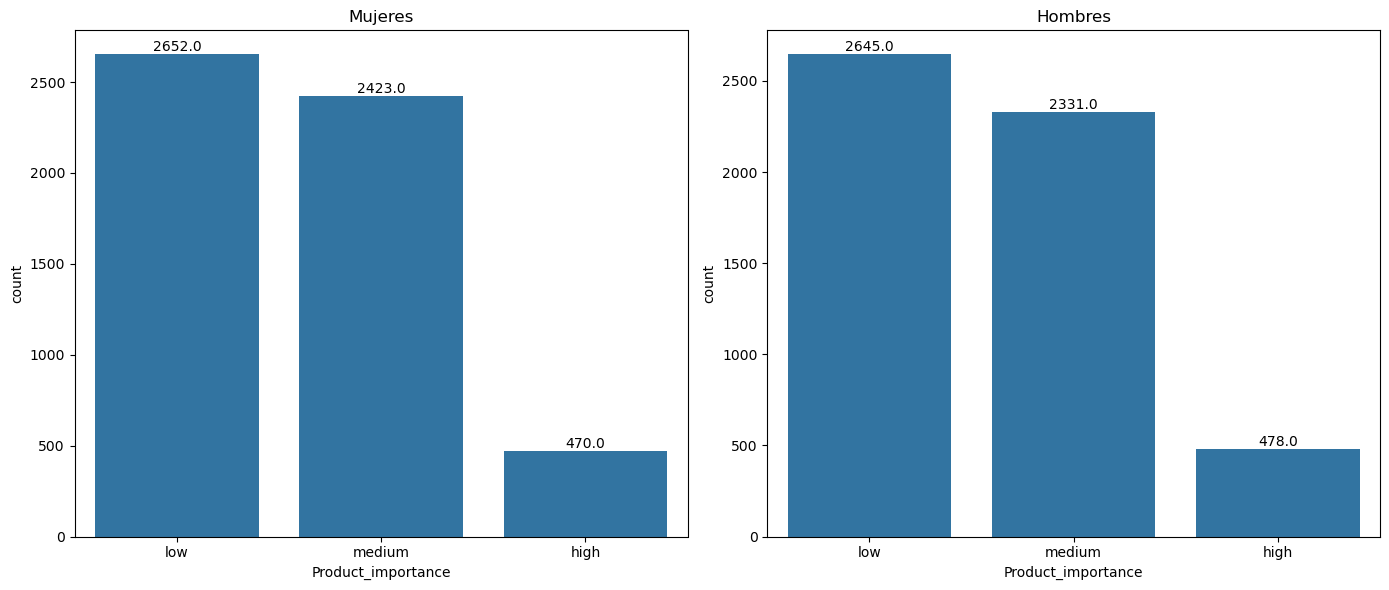

In [92]:
# Crear figura con 1 fila y 2 columnas
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Filtrar por género
mujeres = comercio_df[comercio_df['Gender'] == 'F']
hombres = comercio_df[comercio_df['Gender'] == 'M']

# Countplot para mujeres
sns.countplot(x="Product_importance", data=mujeres, ax=axs[0])
axs[0].set_title("Mujeres")

# Añadir valores encima de cada barra
for p in axs[0].patches:
    axs[0].annotate(str(p.get_height()), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')

# Countplot para hombres
sns.countplot(x="Product_importance", data=hombres, ax=axs[1])
axs[1].set_title("Hombres")

# Añadir valores encima de cada barra
for p in axs[1].patches:
    axs[1].annotate(str(p.get_height()), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')

# Ajustar espacios
plt.tight_layout()
plt.show()


Comparando los resultados, son casi iguales, no dividiremos el conjunto en 2, y crearemos un solo modelo.

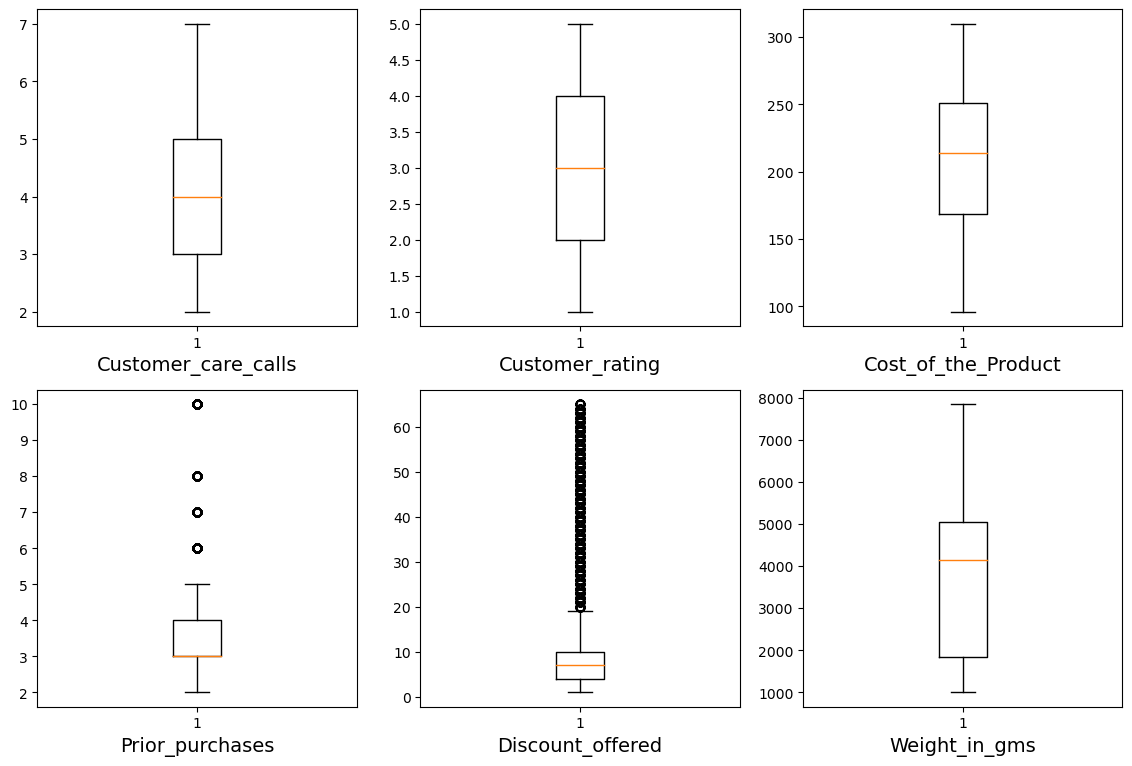

In [93]:
numericas = comercio_df.drop("Reached.on.Time_Y.N", axis='columns')
# Crear un boxplot por cada variable
plt.figure(figsize=(14,14))

plt.subplot(3,3,1)
plt.boxplot(numericas["Customer_care_calls"])
plt.xlabel('Customer_care_calls',fontsize=14)

plt.subplot(3,3,2)
plt.boxplot(numericas["Customer_rating"])
plt.xlabel('Customer_rating',fontsize=14)

plt.subplot(3,3,3)
plt.boxplot(numericas["Cost_of_the_Product"])
plt.xlabel('Cost_of_the_Product',fontsize=14)

plt.subplot(3,3,4)
plt.boxplot(numericas["Prior_purchases"])
plt.xlabel('Prior_purchases',fontsize=14)

plt.subplot(3,3,5)
plt.boxplot(numericas["Discount_offered"])
plt.xlabel('Discount_offered',fontsize=14)

plt.subplot(3,3,6)
plt.boxplot(numericas["Weight_in_gms"])
plt.xlabel('Weight_in_gms',fontsize=14)

plt.show()

Mirando el boxplot de las compras anteriores de los clientes ("Prior purchases") podríamos considerar que los clientes con 6 o más pedidos previos son o bien clientes fieles, o bien compradores compulsivos, este último caso sucedería si las muestras han sido recogidas en un corto espacio de tiempo.

Por otro lado, se observa que los descuentos por encima del 20% son bastante escasos en comparación al resto. Pese a ser valores menos comunes, no los vamos a considerar atípicos.

## 5.- Correlación
(hay que estudiar las correlaciones segun el tipo de variable, relacion numerica-numerica categorica-categorica ordinal-ordinal y todas las combinaciones posibles entre estas)

### Correlación entre variables categóricas

Vamos a usar la V de Cramer, que es una medida estadística que cuantifica la fuerza de la asociación entre dos variables nominales o categóricas, con valores que van de 0 (sin asociación) a 1 (asociación perfecta).

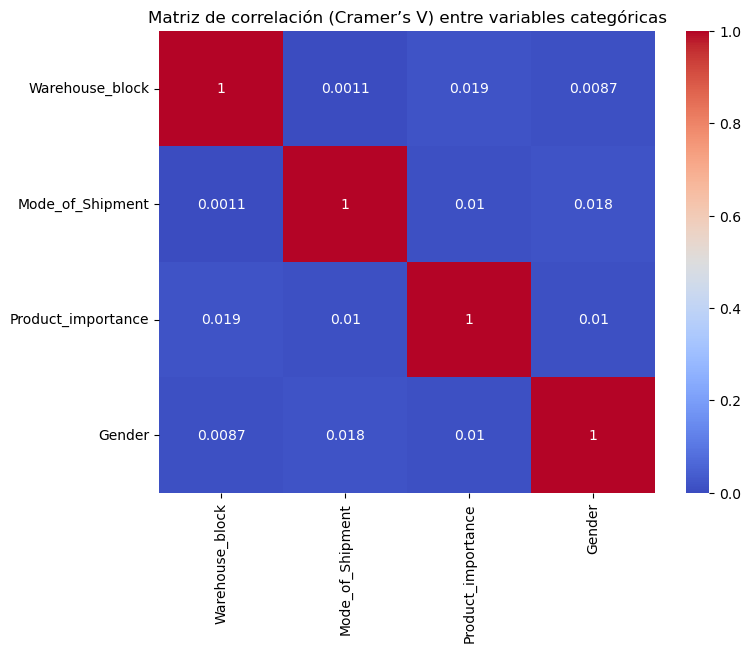

In [94]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

# Seleccionar variables categóricas
cat_cols = comercio_df.select_dtypes(include='object').columns

# Calcular matriz de Cramer’s V
cramers_results = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        cramers_results.loc[col1, col2] = cramers_v(comercio_df[col1], comercio_df[col2])

cramers_results = cramers_results.astype(float)

# Visualizar matriz de correlaciones categóricas
plt.figure(figsize=(8,6))
sns.heatmap(cramers_results, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Matriz de correlación (Cramer’s V) entre variables categóricas")
plt.show()



Mirando los resultados del gráfico, las variables categóricas están casi incorreledas entre si.

### Correlación entre variables numéricas

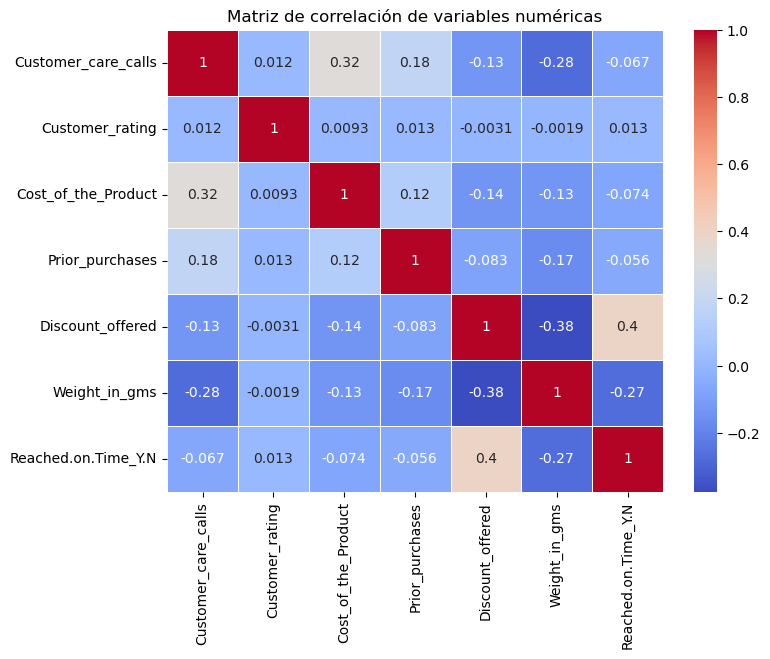

In [95]:
numericas = comercio_df.select_dtypes(include=['int64', 'float64'])
corr = numericas.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de correlación de variables numéricas")
plt.show()

Destacamos: 

  - Cuanto más cuesta el producto, más se preocupa el cliente por él, haciendo más llamadas para saber su estado.
  - La calificación del cliente no aporta nada de información, por lo menos al resto de variables numéricas, veremos si al estudiar luego las relaciones numéricas-categóricas cambia algo.
  - Los productos más pesados tienen menos descuento.
  - En relación con la variable objetivo, a mayor descuento, mayor es la probabilidad de que el pedido llegue a tiempo. Así mismo, los pedidos que pesan más, suelen entregarse tarde.
     

### Correlación entre variables numéricas y categóricas

Para este tipo de relaciones vamos a utilizar eta cuadrado (η²), una medida que cuantifica cuánta proporción de la variabilidad de la variable numérica puede explicarse por las diferencias entre las categorías definidas por la variable categórica.

In [96]:
def eta_squared(data, cat, num):
    groups = [data[num][data[cat] == c] for c in data[cat].unique()]
    
    y = data[num]
    grand_mean = y.mean()
    
    ss_between = sum([len(g) * (g.mean() - grand_mean)**2 for g in groups])
    ss_total = sum((y - grand_mean)**2)
    
    return ss_between / ss_total

# Identificar variables numéricas y categóricas
numericas = comercio_df.select_dtypes(include=['number']).columns
categoricas = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

# Crear tabla vacía
tabla_eta = pd.DataFrame(index=categoricas, columns=numericas)

# Rellenar tabla con η²
for cat in categoricas:
    for num in numericas:
        tabla_eta.loc[cat, num] = eta_squared(comercio_df, cat, num)

tabla_eta


,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Warehouse_block,0.000306,0.00017,0.000714,0.000163,0.000197,0.000033,0.000099
Mode_of_Shipment,0.000415,0.000007,0.000067,0.000016,0.000115,0.000017,0.000068
Product_importance,0.003566,0.000023,0.002341,0.000746,0.000769,0.00879,0.00111
Gender,0.000006,0.000008,0.00039,0.000088,0.000139,0.000013,0.000022


Interpretando los resultados, asumimos que las variables numéricas están prácticamente incorreladas con las categóricas

### One-Hot Encoding

En nuestro dataset hay algunas variables categóricas (gender, warehouse block, mode of shiphment y product importance). Para poder usarlas en los modelos que utilizaremos, necesitamos transformarlas a numérico.

En el caso de Gender, al ser una variable con solo dos categorías podemos convertirla en una variable binaria sin necesidad de usar del One-Hot Encoding.

In [97]:
comercio_copia = comercio_df.copy()

In [98]:
mapear_gender = {"M": 1, "F": 0}
comercio_copia["Gender"] = comercio_copia["Gender"].map(mapear_gender).astype("Int64")

Para las tres variables restantes aplicaremos One-Hot Encoding para convertirlas a formato numérico.

In [99]:
# One Hot Encoding, ponemos la opción drop_first = True ya que las columnas credas con el encoding son linelmte dependientes 
# por lo que podemos tener problemas de multicolineadlida. Entonces eliminamos una columna que es deducible por el resto
warehouse_encoded = pd.get_dummies(comercio_copia["Warehouse_block"], dtype = int)
mode_shipment_encoded = pd.get_dummies(comercio_copia["Mode_of_Shipment"], dtype = int)
product_importance_encode = pd.get_dummies(comercio_copia["Product_importance"], dtype = int)


# Añadimos las variables y eliminamos las originales para evitar problemsa de duplicados
comercio_copia = pd.concat([comercio_copia.drop(columns=["Warehouse_block"]), warehouse_encoded], axis = 1)
comercio_copia = pd.concat([comercio_copia.drop(columns=["Mode_of_Shipment"]), mode_shipment_encoded], axis = 1)
comercio_copia = pd.concat([comercio_copia.drop(columns=["Product_importance"]), product_importance_encode], axis = 1)

In [100]:
comercio_copia.shape
comercio_copia

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,A,B,C,D,F,Flight,Road,Ship,high,low,medium
0,4,2,177,3,0,44,1233,1,0,0,0,1,0,1,0,0,0,1,0
1,4,5,216,2,1,59,3088,1,0,0,0,0,1,1,0,0,0,1,0
2,2,2,183,4,1,48,3374,1,1,0,0,0,0,1,0,0,0,1,0
3,3,3,176,4,1,10,1177,1,0,1,0,0,0,1,0,0,0,0,1
4,2,2,184,3,0,46,2484,1,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,0,1,1538,1,1,0,0,0,0,0,0,1,0,0,1
10995,4,1,232,5,0,6,1247,0,0,1,0,0,0,0,0,1,0,0,1
10996,5,4,242,5,0,4,1155,0,0,0,1,0,0,0,0,1,0,1,0
10997,5,2,223,6,1,2,1210,0,0,0,0,0,1,0,0,1,0,0,1


### Preprocesamiento

Vamos a dividir de forma estratificada el dataset en proporciones del 70% para diseño y 30% para test.

In [101]:
# Dividimos las variables en variable dependiente o variable independiente
X = comercio_copia.drop("Reached.on.Time_Y.N", axis = 1)
y = comercio_copia["Reached.on.Time_Y.N"]

In [102]:
# Separamos el conjunto de diseño (X_train, y_train) y de test (X_test, y_test) de forma estratificada: particiones 70/30
X_diseno, X_test, y_diseno, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
print(X_diseno.shape)
print(y_diseno.shape)
print(X_test.shape)
print(y_test.shape)

(7699, 18)
(7699,)
(3300, 18)
(3300,)


### Normalización de variables

En el EDA hemos visto que las variables tenian valores dispares, esto puede afectar a los resultados de los modelos. Para solucionarlo vamos a escalar las variables para que tengan media 0 y desviación 1.

In [103]:
# Escogemos las columnas númericas
num_col = X_diseno.select_dtypes(include=["int64"]).columns.tolist()

# Creamos y ajustamos el scaler
scaler = StandardScaler()
scaler.fit(X_diseno[num_col])

# Transformamos y asginamos los nuevos valores
X_diseno[num_col] = scaler.transform(X_diseno[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

## Sección II. Esquema lineal y selección de características

En esta sección entrenaremos un modelo de regresión logística para predecir si un envío llega a tiempo o no.

Comenzaremos ajustando una regresión logística básica sin regularización.

In [104]:
# Creamos el modelo y lo entrenamos con el conjunto de diseño
logreg = LogisticRegression(random_state = 0, max_iter = 500)
logreg.fit(X_diseno, y_diseno)
# hacemos predicciones sobre test
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:n")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Real 0 (Llegó a tiempo)', 'Real 1 (No llegó a tiempo)'],    columns=['Pred 0 (Llegó a tiempo)', 'Pred 1 (No llegó a tiempo)'])
cm_df

Accuracy: 0.6463636363636364

Classification report:n
              precision    recall  f1-score   support

           0       0.56      0.59      0.57      1331
           1       0.71      0.69      0.70      1969

    accuracy                           0.65      3300
   macro avg       0.63      0.64      0.64      3300
weighted avg       0.65      0.65      0.65      3300



,Pred 0 (Llegó a tiempo),Pred 1 (No llegó a tiempo)
Real 0 (Llegó a tiempo),784,547
Real 1 (No llegó a tiempo),620,1349


La regresión logística básica tiene un rendimiento moderado, con un accuracy del 65%. El modelo distingue basatante bien los envíos que no llegan a tiempo con un recall de casi el 70%, pero tiene limitaciones a la hora de identificar entregas que han llegado a tiempo con un recall del 59%.  

Los resultados son los esperados para un modelo sin regularización o selección de características, pero nos servirá para comparar con modelos más complejos.

In [105]:
# Encontramos los coeficientes más importantes para el modelo
coef = logreg.coef_[0]
feature_names = X_diseno.columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coeficiente': coef,
    'AbsCoef': np.abs(coef)
})

coef_df = coef_df.sort_values(by='AbsCoef', ascending=False)
print("\nCoeficientes ordenados por importancia:\n")
coef_df


Coeficientes ordenados por importancia:



,Feature,Coeficiente,AbsCoef
5,Discount_offered,1.759602,1.759602
6,Weight_in_gms,-0.396232,0.396232
3,Prior_purchases,-0.138857,0.138857
0,Customer_care_calls,-0.129266,0.129266
2,Cost_of_the_Product,-0.105082,0.105082
15,high,0.064661,0.064661
1,Customer_rating,0.062133,0.062133
4,Gender,0.030745,0.030745
16,low,-0.027007,0.027007
13,Road,-0.010215,0.010215


Si observamos los coeficientes, el que mayor impacto tiene en el retraso de un envio (clase 1) es el descuento que tiene un coeficiente muy superior al resto de características. Las variables que reducen el riesgo a un retraso del envío son el peso, las compras previas o si la importancia del producto es baja. Se puede ver casi todas las variables favorecen que el envío no se haga con retraso. 
También se puede comentar que el tipo de envñio o el almacen donde se guarda el producto no tienen un papael importante en la explciación de retrasos

## Regresión logística con regularización

La regresión logística básica no incluye regularización, lo que puede provocar que los coeficientes sean inestables, que estemos sobreajustando o que haya poca capacidad de generalización.

Para mejorar el modelo y controlar la complejidad de este entrenaremos modelos regularizados. La regularización que vamos es realizar es la l2 (Ridge) ya que está penaliza la magnitud de los coeficientes sin anularlos, lo que "crea" modelos más estable y con mejor generalización.
Además, aunque nuestro dataset haya pasado de 11 a 18 variables despues del one-hot encoding este número de variables sigue siendo bajo y todas la columnas pueden representar información relevante, por lo que la l1 (Lasso) que elimina coeficientes o les da valor de 0 no creemos que sea la mejor opción.

Por lo que hemos decido usar la l2 (Ridge), y p ara seleccionar los hiperparámetros usaremos validación cruzada.

 ### l2 y validación cruzada 

In [106]:
# Regresión logística L2 con GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix)
import pandas as pd
import numpy as np

# Asegurar tipos
y_diseno = y_diseno.astype(int)
y_test = y_test.astype(int)

# Parámetros a buscar
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Definir modelo L2
model_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=2000, random_state=42)

# GridSearchCV (usamos scoring='f1' para priorizar equilibrio precision/recall en la clase positiva)
grid = GridSearchCV(model_l2, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=0)
grid.fit(X_diseno, y_diseno)

# Mejor modelo
best_l2 = grid.best_estimator_
best_C = grid.best_params_['C']
print("Mejor C encontrado (L2):", best_C)

# Predicción y probabilidades
y_pred = best_l2.predict(X_test)
if hasattr(best_l2, "predict_proba"):
    y_prob = best_l2.predict_proba(X_test)[:,1]
else:
    y_prob = best_l2.decision_function(X_test)

# Métricas principales
metrics_dict = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision_pos': precision_score(y_test, y_pred, zero_division=0),
    'Recall_pos': recall_score(y_test, y_pred, zero_division=0),
    'F1_pos': f1_score(y_test, y_pred, zero_division=0),
    'AUC': roc_auc_score(y_test, y_prob)
}
metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=['Value']).round(4)
print("\nMétricas resumen (test):")
display(metrics_df)

# Matriz de confusión en formato tabla
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index=['Real 0 (Llegó a tiempo)', 'Real 1 (No llegó a tiempo)'],
                     columns=['Pred 0 (Llegó a tiempo)', 'Pred 1 (No llegó a tiempo)'])
print("\nMatriz de confusión:")
display(cm_df)

# Coeficientes ordenados por importancia absoluta
coef = best_l2.coef_[0]
features = X_diseno.columns
coef_df = pd.DataFrame({'Feature': features, 'Coeficiente': coef, 'AbsCoef': np.abs(coef)})
coef_df = coef_df.sort_values(by='AbsCoef', ascending=False).reset_index(drop=True)
print("\nCoeficientes ordenados por importancia (top 15):")
display(coef_df.head(15))

# Guardar resultado en el diccionario de resultados si lo necesitas
resultados_l2 = {
    'best_estimator': best_l2,
    'best_C': best_C,
    'metrics': metrics_dict,
    'confusion_matrix': cm,
    'coef_df': coef_df
}


Mejor C encontrado (L2): 0.001

Métricas resumen (test):


,Value
Accuracy,0.6312
Precision_pos,0.6540
Recall_pos,0.8111
F1_pos,0.7241
AUC,0.7322



Matriz de confusión:


,Pred 0 (Llegó a tiempo),Pred 1 (No llegó a tiempo)
Real 0 (Llegó a tiempo),486,845
Real 1 (No llegó a tiempo),372,1597



Coeficientes ordenados por importancia (top 15):


,Feature,Coeficiente,AbsCoef
0,Discount_offered,0.523875,0.523875
1,Weight_in_gms,-0.295798,0.295798
2,Customer_care_calls,-0.094018,0.094018
3,Prior_purchases,-0.082376,0.082376
4,Cost_of_the_Product,-0.077168,0.077168
5,high,0.035588,0.035588
6,Customer_rating,0.033290,0.033290
7,low,-0.016089,0.016089
8,Gender,0.014221,0.014221
9,Road,-0.006432,0.006432


El modelo con regularización L2 obtuvo como mejor hiperparámetro C = 0.001, lo que implica una regularización fuerte. Este modelo presenta un comportamiento caracterizado por una elevada capacidad para detectar retrasos (recall de la clase 1 = 0.809), aunque a costa de un menor rendimiento global (accuracy = 0.629) y una pérdida notable de precisión en la clase 0.

Los coeficientes del modelo se reducen de forma sustancial respecto a la regresión logística sin regularización, manteniendo su signo y jerarquía. Esto confirma que la regularización L2 actúa estabilizando el modelo sin eliminar variables. Las variables más influyentes siguen siendo “Discount_offered” y “Weight_in_gms”, coherentes con el análisis previo.

En conjunto, L2 mejora la capacidad para identificar retrasos (clase de mayor interés en entornos logísticos) y genera un modelo más robusto, aunque sacrifica precisión en las entregas a tiempo. Para este proyecto, y dado el equilibrio entre interpretabilidad y estabilidad, la regularización L2 se considera la opción más adecuada.

### Selección de características

Para identificar qué variables aportan realmente información al modelo, aplicamos 
selección de características mediante RFE (Recursive Feature Elimination) usando 
la regresión logística con regularización L2 como estimador base.

RFE elimina iterativamente las características menos importantes según los 
coeficientes del modelo, permitiendo identificar un subconjunto óptimo de 
predictores que mantenga (o mejore) el rendimiento.

Probamos diferentes números de características para encontrar cuántas son 
realmente necesarias.


In [107]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
import numpy as np

# Modelo base: misma configuración que tu modelo L2
base_model = LogisticRegression(
    penalty='l2', solver='lbfgs', max_iter=2000, C=resultados_l2['best_C'], random_state=42
)

num_features = X_diseno.shape[1]
resultados_rfe = []

# Probamos de 3 a todas las características
for k in range(3, num_features + 1):

    rfe = RFE(estimator=base_model, n_features_to_select=k)
    rfe.fit(X_diseno, y_diseno)

    # Variables seleccionadas
    mask = rfe.support_
    selected_features = X_diseno.columns[mask]

    # Entrenamos modelo solo con esas características
    model = LogisticRegression(
        penalty='l2', solver='lbfgs', max_iter=2000, C=resultados_l2['best_C'], random_state=42
    )
    model.fit(X_diseno[selected_features], y_diseno)

    # Evaluamos en test
    y_pred_rfe = model.predict(X_test[selected_features])
    acc = accuracy_score(y_test, y_pred_rfe)
    f1 = f1_score(y_test, y_pred_rfe)

    resultados_rfe.append([k, acc, f1, selected_features])

# Convertimos resultados a DataFrame
rfe_df = pd.DataFrame(resultados_rfe, columns=["Num_features", "Accuracy", "F1", "Features"])
display(rfe_df)

# Elegimos el mejor número de características según F1
best_row = rfe_df.iloc[rfe_df["F1"].idxmax()]
print("\nMejor número de características según F1:", best_row["Num_features"])
print("\nMejores características seleccionadas:")
display(best_row["Features"])


,Num_features,Accuracy,F1,Features
0,3,0.643636,0.730646,"Index(['Customer_care_calls', 'Discount_offere..."
1,4,0.635455,0.727520,"Index(['Customer_care_calls', 'Prior_purchases..."
2,5,0.626061,0.719927,"Index(['Customer_care_calls', 'Cost_of_the_Pro..."
3,6,0.630303,0.722853,"Index(['Customer_care_calls', 'Cost_of_the_Pro..."
4,7,0.629394,0.723115,"Index(['Customer_care_calls', 'Customer_rating..."
5,8,0.626970,0.721430,"Index(['Customer_care_calls', 'Customer_rating..."
6,9,0.628788,0.722159,"Index(['Customer_care_calls', 'Customer_rating..."
7,10,0.629394,0.722739,"Index(['Customer_care_calls', 'Customer_rating..."
8,11,0.630606,0.723520,"Index(['Customer_care_calls', 'Customer_rating..."
9,12,0.631515,0.724263,"Index(['Customer_care_calls', 'Customer_rating..."



Mejor número de características según F1: 3

Mejores características seleccionadas:


Index(['Customer_care_calls', 'Discount_offered', 'Weight_in_gms'], dtype='object')

## Sección 3: MLP

In [ ]:
Es razonalble usar un MLP de solo una capa en nuestro caso (SLP)?
Ampliar lo de normalizar y poner que ya lo hemos hecho
Aplicar SLP a la seleción de variabels

## Comentarios que nos hacen

Quitar ID
Particiones estradtificadas
Usar one-hot encoding para codificar las variables
Dividir el dataset en male y female, hacer el eda para cada uno y el modelo para cada uno